In [206]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns


In [207]:
df_original = pd.read_csv("merged_data.csv")

df = df_original.copy()


In [208]:
df.columns

Index(['rate_code', 'store_and_fwd_flag', 'pickup_datetime',
       'dropoff_datetime', 'passenger_count', 'trip_time_in_secs',
       'trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'surcharge', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount',
       'pickup_date', 'pickup_day', 'pickup_hour', 'pickup_day_of_week',
       'pickup_minute'],
      dtype='object')

In [209]:
cols_to_drop = ['tip_amount','tolls_amount','total_amount','store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime', 'pickup_date']
df = df.drop(columns=cols_to_drop)
df

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,pickup_day,pickup_hour,pickup_day_of_week,pickup_minute
0,1,1,281,1.00,-73.995728,40.759247,-73.995743,40.769226,CRD,5.5,0.0,0.5,27,8,Sunday,52
1,1,1,840,3.36,-74.005180,40.721748,-73.986519,40.761639,CSH,13.0,0.5,0.5,27,1,Sunday,29
2,1,5,600,2.08,-73.978996,40.739059,-74.004250,40.728504,CSH,9.0,0.0,0.5,24,10,Thursday,23
3,1,1,840,1.66,-73.989639,40.753712,-73.987457,40.736706,CSH,10.0,1.0,0.5,24,18,Thursday,25
4,1,2,1340,8.40,-74.003632,40.741203,-73.979935,40.651749,CRD,26.5,0.5,0.5,27,3,Sunday,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92524,1,1,252,0.90,-73.985718,40.741138,-73.979248,40.749718,CSH,5.5,0.0,0.5,15,11,Tuesday,59
92525,1,1,480,1.93,-73.990044,40.752201,-74.003830,40.716667,CRD,8.5,1.0,0.5,31,18,Thursday,53
92526,1,1,720,1.75,-73.960663,40.762348,-73.981087,40.751060,CRD,9.5,0.0,0.5,4,15,Friday,6
92527,1,1,1560,10.19,-73.994698,40.750320,-73.924683,40.868896,CRD,32.5,0.0,0.5,16,13,Wednesday,56


In [210]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df["pickup_day_of_week"] = encoder.fit_transform(df[["pickup_day_of_week"]])
df['payment_type'] = encoder.fit_transform(df['payment_type'].values.reshape(-1, 1))

df

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,pickup_day,pickup_hour,pickup_day_of_week,pickup_minute
0,1,1,281,1.00,-73.995728,40.759247,-73.995743,40.769226,0.0,5.5,0.0,0.5,27,8,3.0,52
1,1,1,840,3.36,-74.005180,40.721748,-73.986519,40.761639,1.0,13.0,0.5,0.5,27,1,3.0,29
2,1,5,600,2.08,-73.978996,40.739059,-74.004250,40.728504,1.0,9.0,0.0,0.5,24,10,4.0,23
3,1,1,840,1.66,-73.989639,40.753712,-73.987457,40.736706,1.0,10.0,1.0,0.5,24,18,4.0,25
4,1,2,1340,8.40,-74.003632,40.741203,-73.979935,40.651749,0.0,26.5,0.5,0.5,27,3,3.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92524,1,1,252,0.90,-73.985718,40.741138,-73.979248,40.749718,1.0,5.5,0.0,0.5,15,11,5.0,59
92525,1,1,480,1.93,-73.990044,40.752201,-74.003830,40.716667,0.0,8.5,1.0,0.5,31,18,4.0,53
92526,1,1,720,1.75,-73.960663,40.762348,-73.981087,40.751060,0.0,9.5,0.0,0.5,4,15,0.0,6
92527,1,1,1560,10.19,-73.994698,40.750320,-73.924683,40.868896,0.0,32.5,0.0,0.5,16,13,6.0,56


In [211]:
df.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,pickup_day,pickup_hour,pickup_day_of_week,pickup_minute
count,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000
mean,1.026738,1.691783,682.631845,2.739366,-73.975648,40.751586,-73.975178,40.751977,0.480833,11.483512,0.313999,0.498930,16.422095,14.081747,3.183035,30.172508
std,0.228896,1.357762,486.713686,3.255985,0.034854,0.026692,0.035865,0.030195,0.515121,9.291176,0.373481,0.023105,8.850194,5.921601,2.028268,17.028990
min,1.000000,1.000000,1.000000,0.010000,-76.416664,40.094391,-76.083328,40.094524,0.000000,2.500000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,1.000000,360.000000,1.000000,-73.992035,40.737640,-73.991325,40.736919,0.000000,6.500000,0.000000,0.500000,9.000000,10.000000,1.000000,15.000000
50%,1.000000,1.000000,557.000000,1.700000,-73.981926,40.754471,-73.980492,40.754772,0.000000,8.500000,0.000000,0.500000,17.000000,15.000000,3.000000,30.000000
75%,1.000000,2.000000,876.000000,3.000000,-73.968109,40.768120,-73.965858,40.768623,1.000000,13.000000,0.500000,0.500000,24.000000,19.000000,5.000000,45.000000
max,6.000000,6.000000,7242.000000,73.600000,-73.422081,41.252991,-70.433334,41.383331,4.000000,332.000000,1.000000,0.500000,31.000000,23.000000,6.000000,59.000000


In [212]:
X = df.drop(columns=["fare_amount"])
y = df["fare_amount"]

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [214]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [215]:
col = ['payment_type','rate_code', 'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'fare_amount', 'surcharge', 'mta_tax', 'pickup_day', 'pickup_hour',
       'pickup_day_of_week', 'pickup_minute','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']

In [216]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

arr = []
print("significance of the attribute")
for f,idx in enumerate(indices):
    arr.append([round(importances[idx], 4), col[idx]])
    
arr.sort(reverse = True)
arr
    

significance of the attribute


[[0.83, 'trip_time_in_secs'],
 [0.0885, 'passenger_count'],
 [0.0419, 'payment_type'],
 [0.0157, 'mta_tax'],
 [0.0076, 'surcharge'],
 [0.0036, 'trip_distance'],
 [0.0025, 'pickup_day'],
 [0.0025, 'fare_amount'],
 [0.002, 'dropoff_longitude'],
 [0.0012, 'pickup_longitude'],
 [0.0012, 'pickup_day_of_week'],
 [0.0011, 'pickup_minute'],
 [0.0011, 'pickup_hour'],
 [0.0007, 'pickup_latitude'],
 [0.0003, 'rate_code']]

In [217]:
len(indices)

15

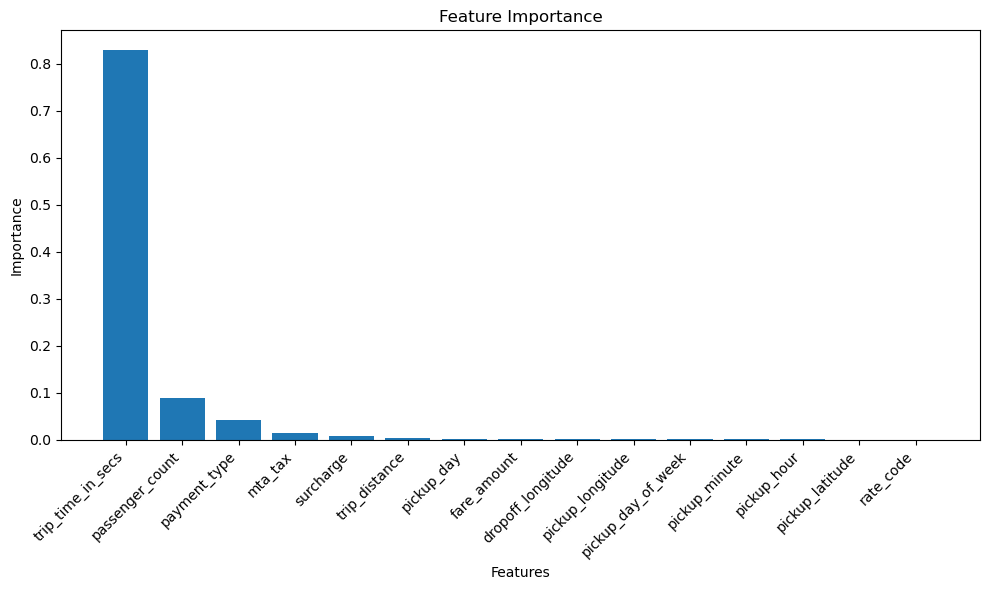

In [218]:
x_a = [item[0] for item in arr]
y_a = [item[1] for item in arr]

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.bar(y_a, x_a)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [219]:
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)


In [220]:
mae

0.3744885802802695

In [221]:
mse

3.2464732835690526

In [222]:
rmse

1.8017972370855309

In [223]:
model.predict(X_test)

array([27.44333333, 10.12666667,  4.12666667, ..., 45.81      ,
        9.31333333,  6.50333333])